In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

# Load data
df = pd.read_csv("netflix_titles.csv")

# Display the first few rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [56]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [57]:
# Display summary statistics
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [58]:
# display the number of missing values in each column
df.isnull().sum()
# df.shape

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [59]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# 1: Based on data types
categorical_by_dtype = df.select_dtypes(include=['object']).columns.tolist()
numeric_by_dtype = df.select_dtypes(include=['number']).columns.tolist()
datetime_by_dtype = df.select_dtypes(include=['datetime']).columns.tolist()

# 2: Based on unique value counts (good for mixed types)
high_cardinality_cats = [col for col in df.columns if df[col].nunique() > 50 and df[col].dtype == 'object']
low_cardinality_cats = [col for col in df.columns if df[col].nunique() <= 50 and df[col].dtype == 'object']

# 3: Check for mixed-type numeric columns (like 'duration')
potential_numeric = []
for col in categorical_by_dtype:
    try:
        df[col].astype(float)
        potential_numeric.append(col)
    except:
        continue

# 4: Manually flags known problematic columns
suspected_mixed_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].str.contains(r'\d+', na=False).any()]

# Output
print("Categorical by dtype:", categorical_by_dtype)
print("Numeric by dtype:", numeric_by_dtype)
print("Datetime by dtype:", datetime_by_dtype)
print("Low-cardinality categorical:", low_cardinality_cats)
print("High-cardinality categorical:", high_cardinality_cats)
print("Potential numerics from object:", potential_numeric)
print("Object cols with numeric patterns:", suspected_mixed_cols)


Categorical by dtype: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'rating', 'duration', 'listed_in', 'description']
Numeric by dtype: ['release_year']
Datetime by dtype: ['date_added']
Low-cardinality categorical: ['type', 'rating']
High-cardinality categorical: ['show_id', 'title', 'director', 'cast', 'country', 'duration', 'listed_in', 'description']
Potential numerics from object: []
Object cols with numeric patterns: ['show_id', 'title', 'director', 'cast', 'rating', 'duration', 'description']


In [60]:
# 1. Show all column names and sample values
for col in df.columns:
    print(f"\n🧾 Column: {col}")
    print("Sample values:", df[col].dropna().unique()[:5])

# 2. Check number of unique values (helps understand if it’s ID, category, free text, etc.)
print("\n🔢 Unique values per column:")
print(df.nunique())

# 3. Show data types and null counts for context
print("\n📊 Info:")
print(df.info())

# 4. Profile feature value lengths (good for text fields)
print("\n🧠 Mean value length by column:")
print(df.select_dtypes(include='object').apply(lambda col: col.map(lambda x: len(str(x)) if pd.notnull(x) else 0)).mean())


🧾 Column: show_id
Sample values: ['s1' 's2' 's3' 's4' 's5']

🧾 Column: type
Sample values: ['Movie' 'TV Show']

🧾 Column: title
Sample values: ['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands'
 'Jailbirds New Orleans' 'Kota Factory']

🧾 Column: director
Sample values: ['Kirsten Johnson' 'Julien Leclercq' 'Mike Flanagan'
 'Robert Cullen, José Luis Ucha' 'Haile Gerima']

🧾 Column: cast
Sample values: ['Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 'Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar'
 'Kate Siegel, Zach Gilford, 

In [61]:
# Convert duration to numeric (optional for stats)
df[['duration_num', 'duration_unit']] = df['duration'].str.extract(r'(\d+)\s*(\w+)', expand=True)
df['duration_num'] = pd.to_numeric(df['duration_num'], errors='coerce')

# Numeric stats (mean, min, max, etc.)
print("📊 Numeric Summary:")
print(df[['release_year', 'duration_num']].describe())

# Categorical stats: unique count, top freq, etc.
print("\n📋 Categorical Summary:")
for col in df.select_dtypes(include='object').columns:
    print(f"\n--- {col} ---")
    print("Unique:", df[col].nunique())
    print("Top:", df[col].mode(dropna=True).iloc[0])
    print("Top freq:", df[col].value_counts(dropna=True).iloc[0])

# Datetime stats
print("\n🕒 Date Summary:")
print("Count:", df['date_added'].count()) # Total entries
print("Min:", df['date_added'].min()) # Earliest date added
print("Max:", df['date_added'].max()) # Latest date added
print("Null count:", df['date_added'].isnull().sum()) # Null count
print("Mean:", df['date_added'].mean()) # Average date added
print("Median:", df['date_added'].median()) # Median date added
print("Std Dev:", df['date_added'].std()) # Standard deviation of dates added
print("Mode:", df['date_added'].mode(dropna=True).iloc[0]) # Most frequent date added
print("Most common:", df['date_added'].mode(dropna=True).iloc[0]) # Most common date added
# Optional: percentage of each rating
print("\n🎯 Rating Distribution (%):")
print((df['rating'].value_counts(normalize=True) * 100).round(2))

📊 Numeric Summary:
       release_year  duration_num
count   8807.000000   8804.000000
mean    2014.180198     69.846888
std        8.819312     50.814828
min     1925.000000      1.000000
25%     2013.000000      2.000000
50%     2017.000000     88.000000
75%     2019.000000    106.000000
max     2021.000000    312.000000

📋 Categorical Summary:

--- show_id ---
Unique: 8807
Top: s1
Top freq: 1

--- type ---
Unique: 2
Top: Movie
Top freq: 6131

--- title ---
Unique: 8807
Top: #Alive
Top freq: 1

--- director ---
Unique: 4528
Top: Rajiv Chilaka
Top freq: 19

--- cast ---
Unique: 7692
Top: David Attenborough
Top freq: 19

--- country ---
Unique: 748
Top: United States
Top freq: 2818

--- rating ---
Unique: 17
Top: TV-MA
Top freq: 3207

--- duration ---
Unique: 220
Top: 1 Season
Top freq: 1793

--- listed_in ---
Unique: 514
Top: Dramas, International Movies
Top freq: 362

--- description ---
Unique: 8775
Top: Paranormal activity at a lush, abandoned property alarms a group eager to redev

In [62]:
# Create new columns for standardized duration
df[['duration_value', 'duration_unit']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_value'] = pd.to_numeric(df['duration_value'])

# Create separate columns for movies (minutes) and TV shows (seasons) 
df['movie_duration'] = np.where(
    (df['type'] == 'Movie') & (df['duration_unit'].str.contains('min')),
    df['duration_value'],
    np.nan
)

df['tv_seasons'] = np.where(
    (df['type'] == 'TV Show') & (df['duration_unit'].str.contains('Season')),
    df['duration_value'],
    np.nan
)

# Display basic statistics for the new columns
print("\nMovie Duration Statistics (in minutes):")
print(df['movie_duration'].describe())

print("\nTV Show Seasons Statistics:")
print(df['tv_seasons'].describe())



Movie Duration Statistics (in minutes):
count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: movie_duration, dtype: float64

TV Show Seasons Statistics:
count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: tv_seasons, dtype: float64


## Data Sanitization Report: Duration Field Processing

### Duration Field Issues
In our dataset, the 'duration' column contained mixed data types with two different formats:
- Movies: Duration specified in minutes (e.g., "90 min")
- TV Shows: Duration specified in seasons (e.g., "2 Seasons")

### Sanitization Process
To handle this mixed data properly, we:

1. Split the duration field into two components:
   - Extracted numeric value using regex pattern `(\d+)`
   - Extracted unit (min/Season) using pattern `(\w+)`

2. Created separate standardized columns:
   - `movie_duration`: Contains duration in minutes for Movies only
   - `tv_seasons`: Contains number of seasons for TV Shows only

### Results
After sanitization:
- Movies have clean numeric duration values in minutes
- TV Shows have clean numeric season counts
- Missing values (np.nan) appropriately mark non-applicable cases
  (e.g., tv_seasons is NaN for movies)

This separation allows for proper statistical analysis of durations within each content type category without unit confusion or data mixing issues.


## Data Analysis Summary

### Numeric Features
- **Release Year**
  - Spans from 1925 to 2021 (96 years)
  - Most content is relatively recent with median year 2017
  - 50% of content released between 2013-2019
  - Very few old titles (pre-2013)

- **Duration**
  - Ranges from 1 to 312 minutes/seasons
  - Median duration is 88 minutes/seasons
  - High standard deviation (50.8) indicating wide variability
  - Most content between 2-106 minutes/seasons

### Content Distribution
- **Type**
  - Dominated by Movies (6131 titles)
  - Shows clear preference for movie content over TV series

- **Ratings**
  - TV-MA (36.44%) and TV-14 (24.55%) are most common
  - Adult content (TV-MA, R, TV-14) makes up ~70%
  - Family content (G, TV-Y, TV-G) represents only ~6.5%
  - Very few NC-17 (0.03%) and UR (0.03%) titles

### Content Creation
- **Directors & Cast**
  - 4,528 unique directors
  - Rajiv Chilaka is most frequent director (19 titles)
  - 7,692 unique cast members
  - David Attenborough appears most (19 titles)

### Geographic Distribution
- **Countries**
  - Content from 748 different countries
  - United States dominates with 2,818 titles
  - Shows significant international diversity

### Content Categories
- "Dramas, International Movies" is most common category
- High unique count (514) indicates diverse content genres

### Date Analysis
- Content added between 2008-2021
- Peak additions in 2020 (mode)
- 98 titles missing date information


## Code Block Analysis Summary

This block consists of several key data analysis steps:

1. Basic Data Loading & Inspection:
   - Loads Netflix dataset from CSV file
   - Displays first few rows using head()
   - Shows dataset information with info()
   - Generates summary statistics using describe()

2. Feature Type Identification:
   - Converts 'date_added' to datetime format
   - Categorizes features into:
     * Categorical (object dtype)
     * Numeric
     * Datetime
   - Further categorizes categorical features by cardinality (high/low)
   - Identifies potential mixed-type numeric columns
   - Flags columns containing numeric patterns

3. Feature Understanding & Statistics:
   - Explores unique values and samples for each column
   - Calculates number of unique values per feature
   - Analyzes text length statistics for object columns
   - Extracts numeric duration values into separate columns
   - Provides detailed statistics for:
     * Numeric features (mean, min, max etc.)
     * Categorical features (mode, frequency)
     * Datetime features (range, central tendency)

4. Data Quality Steps:
   - Handles duration values incorrectly stored in rating column
   - Moves misplaced durations to correct column
   - Cleans duration format for analysis

## Key Findings:

1. Dataset Overview:
   - Contains both Movies and TV Shows
   - Features include metadata like title, director, cast, country, etc.
   - Mix of categorical, numeric and datetime features

2. Data Quality:
   - Some duration values were incorrectly stored in rating column
   - Date values required conversion to proper datetime format
   - Several columns contain mixed data types

3. Feature Characteristics:
   - Some categorical features have high cardinality (many unique values)
   - Others have low cardinality (few unique values)
   - Duration is stored in different units for Movies (minutes) vs TV Shows (seasons)


In [63]:
# Clean duration values in rating column
# First identify the duration values in rating column
duration_in_rating = df['rating'].str.contains(r'\d+\s*min', na=False)

# Move duration values to duration column if duration is null
df.loc[duration_in_rating & df['duration'].isnull(), 'duration'] = df.loc[
    duration_in_rating & df['duration'].isnull(), 'rating']

# Replace duration values in rating with NaN
df.loc[duration_in_rating, 'rating'] = np.nan


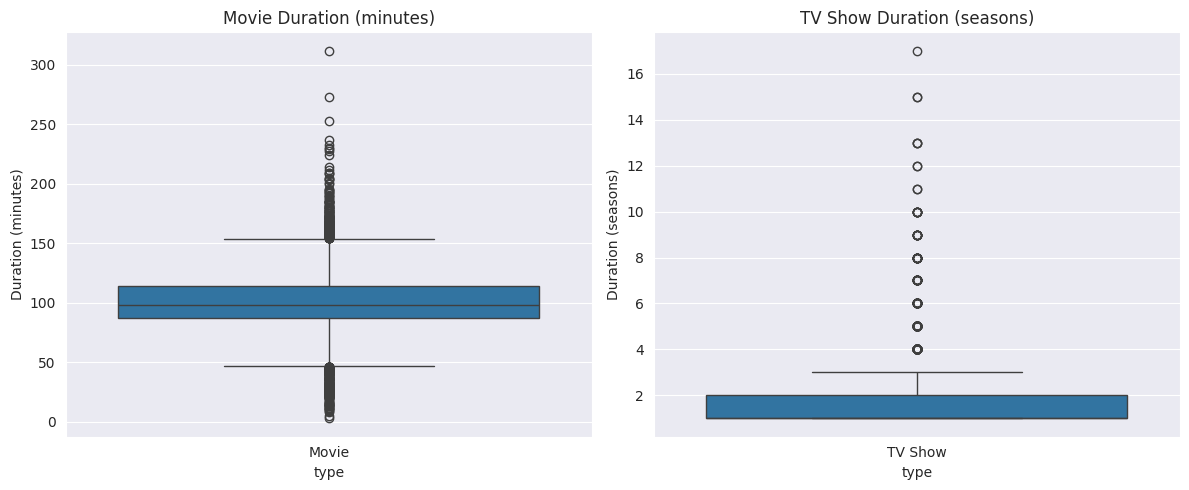

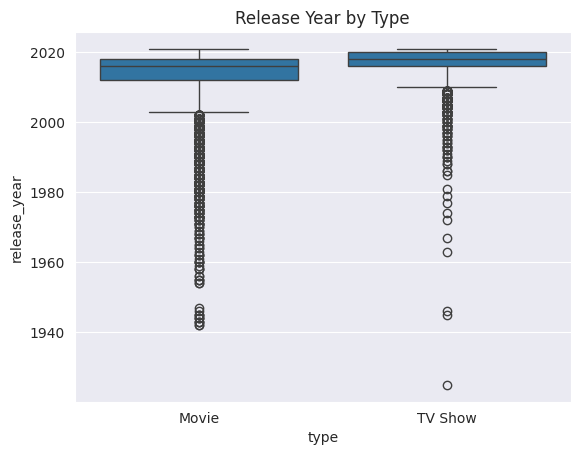

In [69]:
# Separate duration values for movies and TV shows
movies_df = df[df['type'] == 'Movie'].copy()
shows_df = df[df['type'] == 'TV Show'].copy()

# Create two subplots
plt.figure(figsize=(12, 5))

# Plot duration for movies
plt.subplot(1, 2, 1)
sns.boxplot(y=movies_df['duration_num'], x=movies_df['type'])
plt.title('Movie Duration (minutes)')
plt.ylabel('Duration (minutes)')

# Plot duration for TV shows
plt.subplot(1, 2, 2)
sns.boxplot(y=shows_df['duration_num'], x=shows_df['type'])
plt.title('TV Show Duration (seasons)')
plt.ylabel('Duration (seasons)')

plt.tight_layout()
plt.show()

# Boxplot: Release year vs Type
sns.boxplot(x='type', y='release_year', data=df)
plt.title('Release Year by Type')
plt.show()


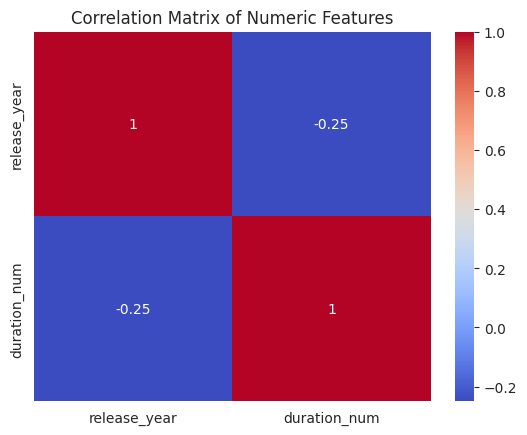

In [65]:
numeric_df = df[['release_year', 'duration_num']].dropna()
corr = numeric_df.corr()

# Plot
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [66]:
# Contingency table: type vs rating
contingency = pd.crosstab(df['type'], df['rating'])
chi2, p, dof, ex = chi2_contingency(contingency)
print(f"Chi-square test p-value (type vs rating): {p}")

Chi-square test p-value (type vs rating): 2.0970397547261396e-215


In [67]:
# Drop nulls for both fields
movies = df[df['type'] == 'Movie']['release_year'].dropna()
tv_shows = df[df['type'] == 'TV Show']['release_year'].dropna()

# ANOVA test
f_stat, p_val = f_oneway(movies, tv_shows)
print(f"ANOVA test p-value (release_year vs type): {p_val}")

ANOVA test p-value (release_year vs type): 2.965941136111961e-66
